## Feature Detecting and Matching Using OpenCV

### Feature Detection

#### Harris Corner Detection

Earliest approach for detecting corners in images. It looks for region in the image where there is significant vaariations in intensity in all directions. Corners are detected where there is a large change in intensity when moving the window in any direction. Response function,

R = det(M) - k.(trace(M))² ; if R > threshold, the point is considered a corner.

Advantages: 
- Simple and efficient. 
- Provide good results for well-defined corners.<br>

Disadvantages: 
- Sensitive to noise. 
- Not scale-invariant.

Role:
- Detector

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

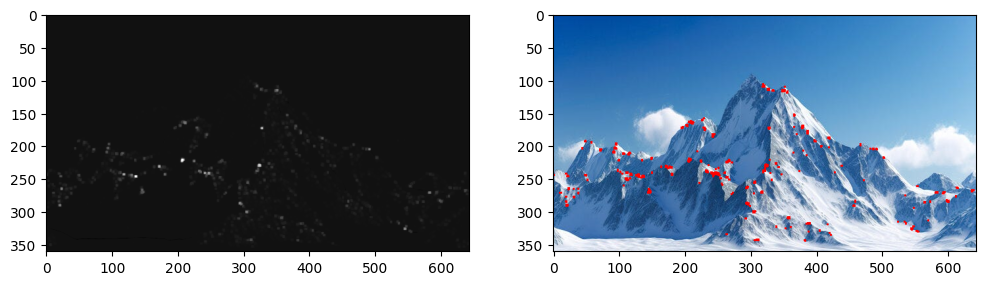

In [2]:
img_name = 'data/mountain.jpg'

img = cv2.imread(img_name)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
gray = np.float32(gray)
# parameters: image, blocksize, kernel, sensitivity of corner detector
harris = cv2.cornerHarris(gray, 3, 3, 0.04)
 
#result is dilated for marking the corners, not important
harris = cv2.dilate(harris,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img[harris>0.08*harris.max()]=[0,0,255]

plt.figure(figsize=(12,7))
plt.subplot(121), plt.imshow(harris, cmap='gray')
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

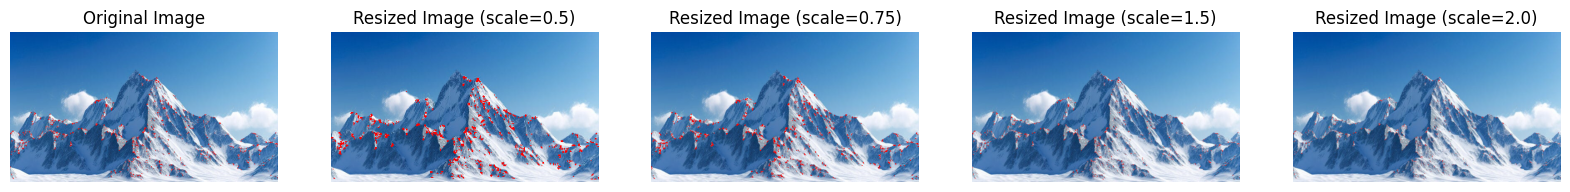

In [3]:
# Function to detect Harris corners
def detect_harris_corner(image, block_size, ksize, k):
    gray = np.float32(image)
    harris_corners = cv2.cornerHarris(gray, block_size, ksize, k)
    return harris_corners


# Load and convert the image to grayscale
img_path = 'data/mountain.jpg'
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Apply Harris Corner Detection on the original image
harris_corners_original = detect_harris_corner(gray_image, 2, 3, 0.04)

# Resize the image with different scaling factors
scale_factors = [0.5, 0.75, 1.5, 2.0]
resized_images = [cv2.resize(gray_image, (0,0), fx=sf, fy=sf) for sf in scale_factors]
harris_corner_resized = [detect_harris_corner(img, 2, 3, 0.04) for img in resized_images]

# mark the corner on the images 
image_with_corners_original = image.copy()
image_with_corners_original[harris_corners_original > 0.01 * harris_corners_original.max()] = [0, 0, 255]

resized_image_with_corners = []
for i, img in enumerate(resized_images):
    colored_img = cv2.resize(image, (img.shape[1], img.shape[0]))
    corners = harris_corner_resized[i]
    colored_img[corners > 0.01 * corners.max()] = [0, 0, 255]
    resized_image_with_corners.append(colored_img)

# display the result
plt.figure(figsize=(20,20))

plt.subplot(1, len(scale_factors) + 1, 1)
plt.imshow(cv2.cvtColor(image_with_corners_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

for i, img in enumerate(resized_image_with_corners):
    plt.subplot(1, len(scale_factors) + 1, i + 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Resized Image (scale={scale_factors[i]})')
    plt.axis('off')

plt.show()

#### Shi-Tomasi Corner Detector & Good Features to Track

An improvement over harris corner detection and is widely used for applications like object tracking, structure from motion, and image stiching. It is more robust in identifying corners that are good for tracking purpose like optical flow.

Advantages: 
- Computationally simpler than Harris.
- Less sensitive to noise and more robust in identifying corners compared to Harris detector.

Disadvantages:
- Not scale-invariant.
- Sensitive to image quality.
- Fixed number of features need to be specified, sometimes important corners might be missed, if too few features are specified.

Role:
- Detector

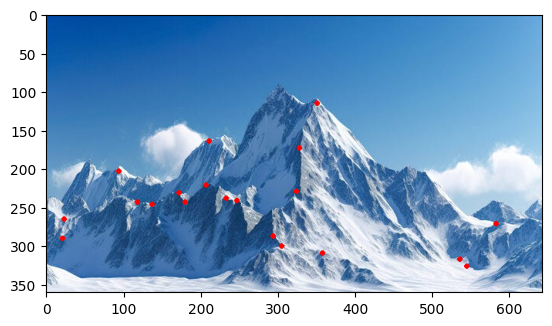

In [4]:
img_name = 'data/mountain.jpg'

img = cv2.imread(img_name)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Parameters for Shi-Tomasi corner detection
max_corners = 20  # Maximum number of corners to return
quality_level = 0.01  # Minimum quality of corners (0 to 1)
min_distance = 10  # Minimum possible Euclidean distance between the returned corners

corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)
corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    # cv2.circle(img, (x,y), 3, 255, -1)
    cv2.circle(img, (x,y), 2, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show();

In [5]:
x,y

(536, 317)

#### Scale Invariant Feature Transform

Feature detection algorithm  for detecting and describing local features in images by identifying keypoints in images that are invariant to sacle, rotation and illumination changes. It works by: detecting keypoints by searching for local extrema, refines the keypoint location to sub-pixel accuracy and assigns an orientation to each keypoint based on local image gradients, descriptor is then generated by creating histogram of gradien orientation within local region around the keypoint.

Advantages:
- Scale-invariant and rotation-invariant.
- Provide distinctive descriptors that are useful for matching features across different images.

Disadvantages:
- Computationally expensive.

Role:
- Detector and Descriptor

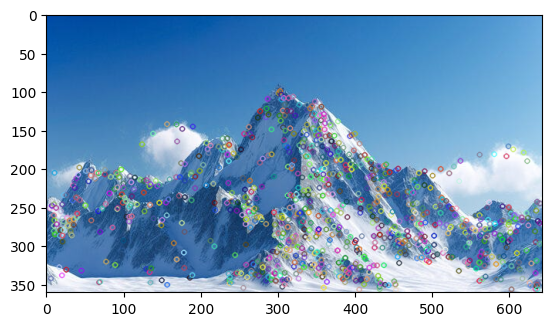

In [6]:
img_path = 'data/mountain.jpg'

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initailize sift detector
sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)

img_with_keypoints = cv2.drawKeypoints(img, keypoints, img)
# kp, des = sift.detectAndCompute(gray,None)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

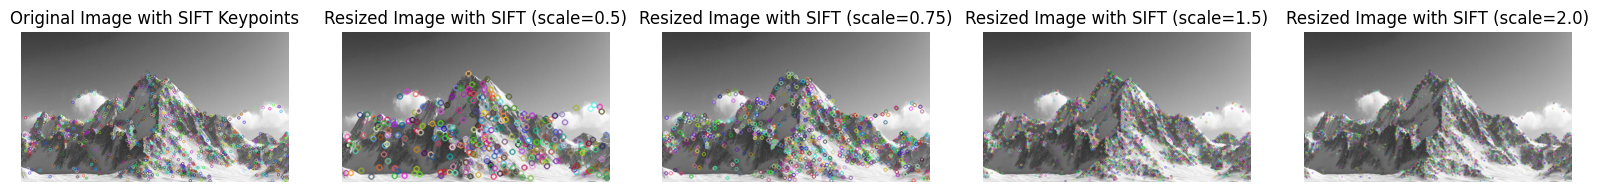

In [7]:
# Function to detect SIFT keypoints and draw them on the image
def detect_sift(image):
    sift = cv2.SIFT_create()
    keypoints = sift.detect(image, None)
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
    return img_with_keypoints

# Load and convert the image to grayscale
img_path = 'data/mountain.jpg'
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Apply SIFT on the original image
sift_corners_original = detect_sift(gray_image)

# Resize the image with different scaling factors
scale_factors = [0.5, 0.75, 1.5, 2.0]
resized_images = [cv2.resize(gray_image, (0, 0), fx=sf, fy=sf) for sf in scale_factors]
sift_corner_resized = [detect_sift(img) for img in resized_images]

# Display the results
plt.figure(figsize=(20, 10))

plt.subplot(1, len(scale_factors) + 1, 1)
plt.imshow(sift_corners_original, cmap='gray')
plt.title('Original Image with SIFT Keypoints')
plt.axis('off')

for i, img in enumerate(sift_corner_resized):
    plt.subplot(1, len(scale_factors) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f'Resized Image with SIFT (scale={scale_factors[i]})')
    plt.axis('off')

plt.show()

#### Speeded-up robust features (SURF)

Robust local feature detector and descriptor that is used for tasks such as object recognition and image matching. It improves upon the SIFT algorithm by using an integral image for image convolutions and a Hessian matrix-based measure for both scale and location selection, making it faster and more efficient while maintaining good accuracy and robustness.

Advantages:
- Faster than SIFT due to use of integral images and box filters.
- Scale-invariant and rotation-invariant.

Disadvantages:
- Still computationally expensive compared to simpler methods.
- Patent restriction, which means it is not included in the standard OpenCV packages from PyPI due to licensing issues. To use SURF, you need to build OpenCV from source with the contrib modules and enable the OPENCV_ENABLE_NONFREE flag during the build process.

Role:
- Detector and Descriptor

In [9]:
# img_name = 'data/mountain.jpg'

# img = cv2.imread(img_name)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# surf = cv2.xfeatures2d.SURF_create(400)


In [ ]:
import cv2
print(cv2.__version__)

4.9.0


#### Features from Accelerated Segment Test (FAST)

All the above feature detection methods are good in some way. But they are not fast enough to work in real-time applications like SLAM. There comes the FAST algorithm, which is really "FAST". However FAST gives us only the key points and we may need to compute descriptors with other algorithms like SIFT and SURF. FAST checks the intensity of a circular neighborhood of 16 pixels around a candidate pixel. If a set of contiguous pixels is significantly brighter or darker than the candidate pixel, it is considered a corner.

Advantages:
- Extremely fast and suitable for real-time applications.
- Simple and easy to implement.

Disadvantages:
- Not scale-invariant or rotation-invariant.
- Susceptible to noise; may not perform as well as SIFT or SURF in some scenarios, especially for complex texture patterns.

Role:
- Detector

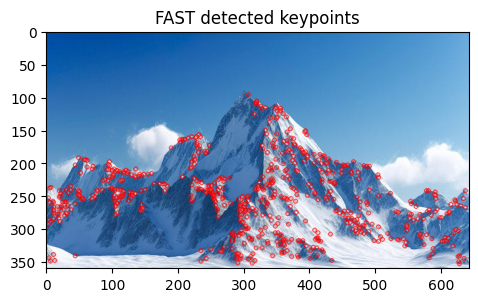

In [14]:
# load and convert image to grayscale
img_name = 'data/mountain.jpg'
img = cv2.imread(img_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialize fast detector
fast = cv2.FastFeatureDetector_create()
# set threshol value
fast.setThreshold(50)
# detect keypoints with non max suppression
keypoints = fast.detect(img, None)

img2 = cv2.drawKeypoints(img, keypoints, None, color=(0,0,255))

plt.figure(figsize=(12,7))
plt.subplot(121), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('FAST detected keypoints')
# plt.subplot(122), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), plt.title('Without non max suppression')
plt.show();

In [ ]:
# # load and convert image to grayscale
# img_name = 'data/mountain.jpg'
# img = cv2.imread(img_name)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # initialize fast detector
# fast = cv2.FastFeatureDetector_create()
# # set threshol value
# fast.setThreshold(50)
# # detect keypoints with non max suppression
# keypoints_with_nonmax_supp = fast.detect(img, None)

# # diable nonmaxsuppression
# fast.setNonmaxSuppression(0)
# # detect keypoints without non max suppression
# keypoints_without_nonmax_supp = fast.detect(img, None)

# print( "Total Keypoints with nonmaxSuppression: {}".format(len(keypoints_with_nonmax_supp)) )
# print( "Total Keypoints withouot nonmaxSuppression: {}".format(len(keypoints_without_nonmax_supp)) )
 
# # image_with_nomax_supp = np.copy(img)
# # image_without_nomax_supp = np.copy(img)

# # darw keypoints on the input images
# # img2 = cv2.drawKeypoints(img, keypoints_with_nonmax_supp, image_with_nomax_supp, color=(0,0,255))
# # img3 = cv2.drawKeypoints(img, keypoints_without_nonmax_supp, image_without_nomax_supp, color=(0, 0, 255))

# img2 = cv2.drawKeypoints(img, keypoints_with_nonmax_supp, None, color=(0,0,255))
# img3 = cv2.drawKeypoints(img, keypoints_without_nonmax_supp, None, color=(0, 0, 255))

# plt.figure(figsize=(12,7))
# plt.subplot(121), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('With non max suppression')
# plt.subplot(122), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), plt.title('Without non max suppression')
# plt.show();

#### BRIEF (Binary Robust Independent Elementary Features)

BRIEF is a feature descriptor to describe keypoints detected in images. Unlike other descriptors that use floating-point values, BRIEF uses strings to describe the region arounf the a keypoint, making it both fast and memory-efficient.

Advantages: 
- Extremely fast computation, efficient memory usage.

Disadvantages: 
- Less distinctive, not scale or rotation-invariant.

Role:
- Descriptor

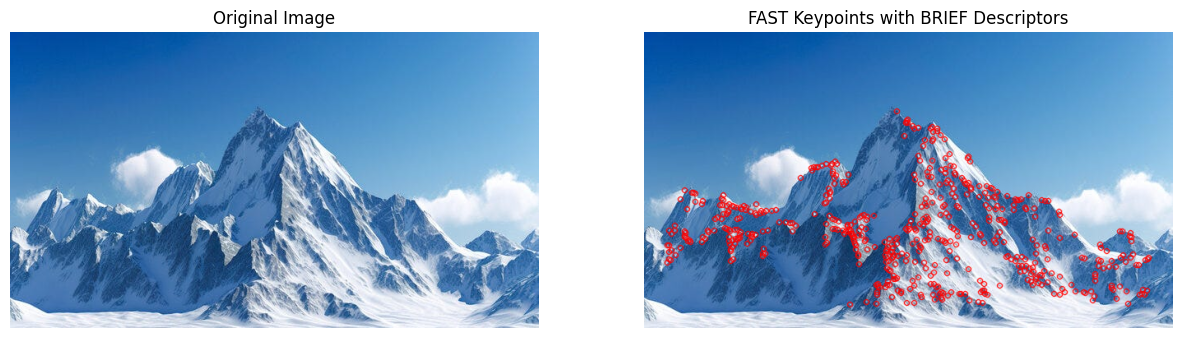

Number of keypoints detected: 529
Shape of BRIEF descriptors: (529, 32)


In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img_name = 'data/mountain.jpg'
image = cv2.imread(img_name)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initiate FAST detector
fast = cv2.FastFeatureDetector_create()
fast.setThreshold(50)

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with FAST
keypoints = fast.detect(gray_image, None)

# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray_image, keypoints)

# Draw keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 0, 255))

# Display the results
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)), plt.title('FAST Keypoints with BRIEF Descriptors'), plt.axis('off')

plt.show()

# Print the number of keypoints and the shape of the descriptors
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Shape of BRIEF descriptors: {descriptors.shape}")


#### ORB (Oriented FAST and Rotated BRIEF)

ORB (Oriented FAST and Rotated BRIEF) is an efficient alternative to SIFT/SURF and is part of the main OpenCV library. Similar to SIFT/SURF, it detects keypoints and computes descriptors. Combination of FAST and BRIEF with improvements, fast, efficient, and rotation-invariant, suitable for real-time applications.

Advantages:
- Fast and efficient, suitable for real-time applications.
- Rotation-invariant and robust to noise.
- Does not have patent restrictions, unlike SIFT and SURF.

Disadvantages:
- May not perform as well as SIFT or SURF in some scenarios, especially for complex texture patterns.
- Not scale-invariant.

Role:
- Detector and descriptor.

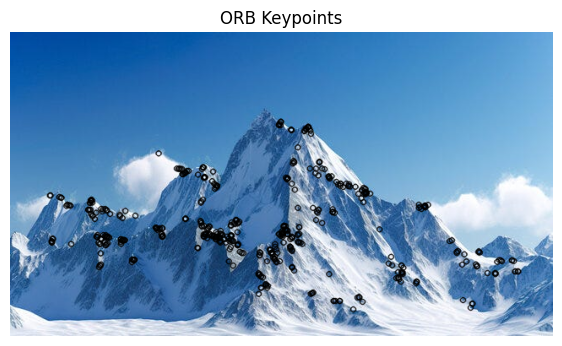

In [ ]:
# Load the image and convert to grayscale
img = cv2.imread('data/mountain.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create ORB detector 
orb = cv2.ORB_create()

# detect keypoints
keypoints = orb.detect(gray, None)
# compute descriptor
descriptors = orb.compute(gray, None)

# # can be done by a single function as well
# keypoints, descriptors = orb.detectAndCompute(gray, None)
 
# draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0,0,0), flags=0)

# display the results
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

### Feature Matching

#### Detect keypoints, create descriptor, and match features using FAST, BRIEF, and BruteForce algorithms

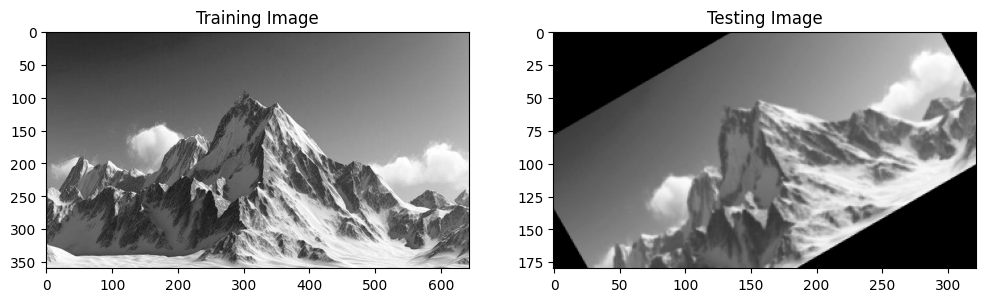

In [16]:
# load and convert image to grayscale
img_name = 'data/mountain.jpg'
train_image = cv2.imread(img_name)
train_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)

# create test image by altering the image we already have
test_image = cv2.pyrDown(img)
height, width = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (width, height))
test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(12,7))
plots[0].set_title("Training Image")
plots[0].imshow(train_gray, cmap='gray')

plots[1].set_title("Testing Image")
plots[1].imshow(test_gray, cmap='gray')


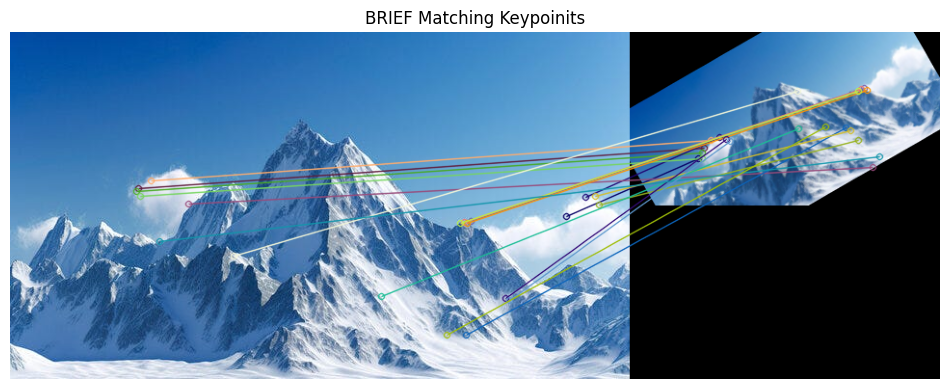

In [17]:
# initailize fast detector
fast = cv2.FastFeatureDetector_create()

# detect keypoints using FAST
train_keypoints = fast.detect(train_gray, None)
test_keypoints = fast.detect(test_gray, None)

# initialize BRIED extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# compute BRIEF descriptor for the keypoints
train_keypoints, train_descriptor = brief.compute(train_gray, train_keypoints)
test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)

# compute BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # hamming distance used

# match descriptors
matches = bf.match(train_descriptor, test_descriptor)

# sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(train_image, train_keypoints,
                              test_image, test_keypoints,
                              matches[:20], None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# display the matches
plt.figure(figsize=(12,7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('BRIEF Matching Keypoinits')
plt.axis('off')
plt.show()

In [ ]:
len(matches)

249

#### Detect keypoints, create descriptor, and match features using SIFT, and BruteForce algorithms

In [1]:
# load and convert image to grayscale
img_name = 'data/mountain.jpg'
train_image = cv2.imread(img_name)
train_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)

# create test image by altering the image we already have 
test_image = cv2.pyrDown(train_image)
height, width = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (width, height))
test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)


# initailize sift detector
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors for both images
train_keypoints, train_descriptor = sift.detectAndCompute(train_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

# create bruteforce matcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# match descriptors
# matches = bf.match(train_descriptor, test_descriptor)
matches = bf.match(train_descriptor, test_descriptor)

# sort mathes by distance
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(train_image, train_keypoints,
                              test_image, test_keypoints,
                              matches[:20], None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# display the matches
plt.figure(figsize=(12,7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT Matching Keypoinits')
plt.axis('off')
plt.show()


NameError: name 'cv2' is not defined